In [9]:
import cbmpy
import escher
from cbmpy.CBModel import Model, Reaction 
from KineticModel import KineticModel

from dynamic_fba import dynamic_fba

import matplotlib.pyplot as plt
import numpy as np


In [25]:
model: Model = cbmpy.loadModel("../../data/bigg_models/e_coli_core.xml")
model.createReaction("Uptake_glucose", "another glucose uptaker", True)
reaction: Reaction = model.getReaction("Uptake_glucose")
# reaction.createReagent("M_glc__D_e", -1)
# reaction.createReagent("M_g6p_c", 3)
# , "Uptake_glucose": [2, 5]
ex_r: Reaction = model.getReaction("R_EX_glc__D_e")
ex_r.is_exchange = True
ex_r.setLowerBound(-100)
ex_r: Reaction = model.getReaction("R_EX_gln__L_e")
ex_r.is_exchange = True
ex_r.setLowerBound(-100)


Attempting to load SBML file: ../../data/bigg_models/e_coli_core.xml
SBML Level 3 FBC version 2 model detected, loading with cbmpy.readSBML3FBC()
FBC version: 2
M.getNumReactions: 95
M.getNumSpecies: 72
FBC.getNumObjectives: 1
FBC.getNumParameters: 5
FBC.getNumGeneProducts: 137
Zero dimension compartment detected: e
Zero dimension compartment detected: c
FluxBounds process1: 0.001
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.001

SBML3 load time: 0.162


Reaction "Uptake_glucose" bounds set to: -INF <= Uptake_glucose <= INF
Add reagents with cmod.createReactionReagent(Uptake_glucose, metabolite, coefficient)


In [17]:


kinetic_model: KineticModel = KineticModel(
    model, {"R_GLCpts": [10, 5], "R_GLNabc": [3, 5]}
)

ts = np.linspace(0, 15, 100)
y = dynamic_fba(
    kinetic_model,
    "R_BIOMASS_Ecoli_core_w_GAM",
    ts,
    {"M_glc__D_e": [3], "biomass": [0.1], "M_gln__L_e": [100]},
)

Attempting to load SBML file: ../../data/bigg_models/e_coli_core.xml
SBML Level 3 FBC version 2 model detected, loading with cbmpy.readSBML3FBC()
FBC version: 2
M.getNumReactions: 95
M.getNumSpecies: 72
FBC.getNumObjectives: 1
FBC.getNumParameters: 5
FBC.getNumGeneProducts: 137
Zero dimension compartment detected: e
Zero dimension compartment detected: c
FluxBounds process1: 0.001
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.001

SBML3 load time: 0.16


Reaction "Uptake_glucose" bounds set to: -INF <= Uptake_glucose <= INF
Add reagents with cmod.createReactionReagent(Uptake_glucose, metabolite, coefficient)

cplx_constructLPfromFBA time: 0.0033903121948242188


cplx_analyzeModel FBA --> LP time: 0.003422975540161133

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 16 rows and 16 columns.
Aggregator did 24 substitutions.
Reduced LP has 32 rows, 56 columns,

/Users/stevenwijnen/Bioinformatica/year2/SysBio_lab/lab_github/dynamic-community-fba/code/endPointFBA/dynamic_fba.py:119: RuntimeWarning: invalid value encountered in double_scalars
  v_hat = -S / (X * dt)



cplx_constructLPfromFBA time: 0.0016520023345947266


cplx_analyzeModel FBA --> LP time: 0.0017516613006591797

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 16 rows and 16 columns.
Aggregator did 24 substitutions.
Reduced LP has 32 rows, 56 columns, and 222 nonzeros.
Presolve time = 0.00 sec. (0.11 ticks)
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =          1000.000000
INFO: Model is optimal: 1
Solution status =  1 : optimal
Solution method =  2 : dual
Objective value =  0.4815134149952647
Solution available (status=optimal) type: 1
Model is optimal
Status: LPS_OPT
Solution available (status=optimal) type: 1
Model is optimal
Solution available (status=optimal) type: 1
Model is optimal

analyzeModel objective value: 0.4815134149952647


cplx_constructLPfromFBA time: 0.0021250247955322266


cplx_analyzeModel FBA --> LP time: 0.0

[100.0, 99.95670995670996, 99.91071968932437, 99.86186085961828, 99.80995464633943, 99.75481109391134, 99.69622842087378, 99.63399228559905, 99.56787500667542, 99.49763473519448, 99.42301457601538, 99.34374165490664, 99.25952612828443, 99.17006013207472, 99.07501666602505, 98.97406772551702, 98.86699014496705, 98.75357300092621, 98.63362071804018, 98.50695618963816, 98.37342379933123, 98.23289220911984, 98.08525676316033, 97.93044134783729, 97.76839955164753, 97.59911498577674, 97.42260066016352, 97.23889736033985, 97.04807103474398, 96.85020927483767, 96.64541704288311, 96.43381186484417, 96.215518749155, 95.99066510914354, 95.75937595502916, 95.52176958293695, 95.27795393003672, 95.02802369626316, 94.77205826421658, 94.51012038836762, 94.24225557828596, 93.96849207063475, 93.68884127054498, 93.4033005916354, 93.1118557253064, 92.81447792536426, 92.51112529990166, 92.2017441062944, 91.88627000099052, 91.56462921116217, 91.23673960792996, 90.90251167076568, 90.56184934008007, 90.214650

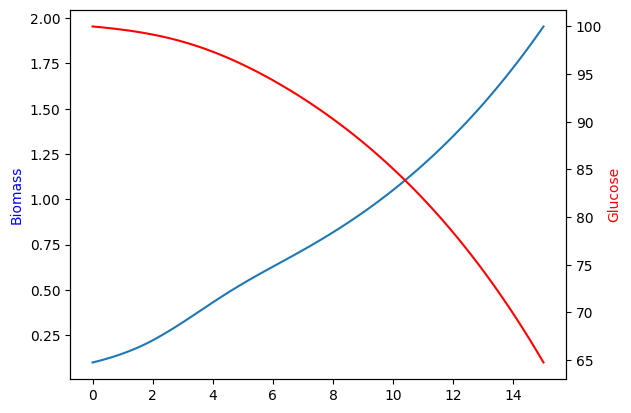

In [8]:

y2 = y["biomass"][1:101]

y1 = y["M_gln__L_e"][1:101]
ts = ts[0:101]
print(y1)
ax = plt.subplot(111)
ax.plot(ts, y2)
ax2 = plt.twinx(ax)
ax2.plot(ts, y1, color="r")

ax.set_ylabel("Biomass", color="b")
ax2.set_ylabel("Glucose", color="r")

plt.show()


In [35]:
model: Model = cbmpy.loadModel("../../data/bigg_models/e_coli_core.xml")
model.createReaction("Uptake_glucose", "another glucose uptaker", True)
reaction: Reaction = model.getReaction("Uptake_glucose")
# reaction.createReagent("M_glc__D_e", -1)
# reaction.createReagent("M_g6p_c", 3)
# , "Uptake_glucose": [2, 5]
ex_r: Reaction = model.getReaction("R_EX_glc__D_e")
ex_r.is_exchange = True
ex_r.setLowerBound(0)
ex_r: Reaction = model.getReaction("R_EX_gln__L_e")
ex_r.is_exchange = True
ex_r.setLowerBound(-100)

Attempting to load SBML file: ../../data/bigg_models/e_coli_core.xml
SBML Level 3 FBC version 2 model detected, loading with cbmpy.readSBML3FBC()
FBC version: 2
M.getNumReactions: 95
M.getNumSpecies: 72
FBC.getNumObjectives: 1
FBC.getNumParameters: 5
FBC.getNumGeneProducts: 137
Zero dimension compartment detected: e
Zero dimension compartment detected: c
FluxBounds process1: 0.002
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.001

SBML3 load time: 0.172


Reaction "Uptake_glucose" bounds set to: -INF <= Uptake_glucose <= INF
Add reagents with cmod.createReactionReagent(Uptake_glucose, metabolite, coefficient)


In [36]:
import pandas as pd
from cobra.io import read_sbml_model
cbmpy.saveModel(model, '../../data/test_model.xml')
cobra_model = read_sbml_model('../../data/test_model.xml')


# solution = cbmpy.doFBA(model)
# FBAsol = model.getSolutionVector(names = True)
# FBAsol = pd.DataFrame(zip(FBAsol[1], FBAsol[0]), columns = ['ID', 'flux'])
# FBAsolNonZero = FBAsol.loc[(FBAsol['flux'] != 0.0)]

# FBAdict = dict(zip(FBAsolNonZero['ID'], FBAsolNonZero['flux']))

solution = cobra_model.optimize()
print(solution)
builder = escher.Builder(
    map_name='e_coli_core.Core metabolism',
    model_name='e_coli_core',
    reaction_data = solution.fluxes,
    model = cobra_model,
)
# builder.model = model

builder.reaction_data = solution.fluxes
builder



INFO: using FBC version: 2
INFO: V2 bounds compression enabled
INFO: added 0 non fluxbound parameters to model
Model exported as: ../../data/test_model.xml
<Solution 5.998 at 0x28c9c7190>


/opt/homebrew/Caskroom/miniconda/base/envs/sysbio_1/lib/python3.10/site-packages/escher/plots.py:544: UserWarning: model overrides model_name
  warn('model overrides model_name')


Builder(reaction_data={'PFK': 0.0, 'PFL': 0.0, 'PGI': -1.2296476054900485, 'PGK': 15.945230388654611, 'PGL': 0…